<a href="https://colab.research.google.com/github/khuongduying/data-transformation/blob/main/basic_data_transformation_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data transformation

## Introduction

It's rare that you get the data in exactly the right form you need to make the graph you want.

Often you'll need to create some new variables or summaries to answer your questions with your data, or maybe you just want to rename the variables or reorder the observations to make the data a little easier to work with.

Data transformation using the dplyr package and a new dataset on flights that departed from New York City in 2013.

### Prequisites

In [ ]:
install.packages("nycflights13")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(nycflights13)
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


### nycflights13

This dataset contains all 336,776 flights that departed from New York City in 2013.

In [ ]:
?flights

`flights` is a tibble, a special type of data frame used by the tidyverse to avoid some common gotchas.

The most important difference between tibbles and data frames is the way tibbles print; they are designed for large datasets, so they only show the first few rows and only the columns that fit on the screen.

In [ ]:
View(head(flights))

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


In [ ]:
glimpse(flights)

Rows: 336,776
Columns: 19
$ year           <int> 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2…
$ month          <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ day            <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ dep_time       <int> 517, 533, 542, 544, 554, 554, 555, 557, 557, 558, 558, …
$ sched_dep_time <int> 515, 529, 540, 545, 600, 558, 600, 600, 600, 600, 600, …
$ dep_delay      <dbl> 2, 4, 2, -1, -6, -4, -5, -3, -3, -2, -2, -2, -2, -2, -1…
$ arr_time       <int> 830, 850, 923, 1004, 812, 740, 913, 709, 838, 753, 849,…
$ sched_arr_time <int> 819, 830, 850, 1022, 837, 728, 854, 723, 846, 745, 851,…
$ arr_delay      <dbl> 11, 20, 33, -18, -25, 12, 19, -14, -8, 8, -2, -3, 7, -1…
$ carrier        <chr> "UA", "UA", "AA", "B6", "DL", "UA", "B6", "EV", "B6", "…
$ flight         <int> 1545, 1714, 1141, 725, 461, 1696, 507, 5708, 79, 301, 4…
$ tailnum        <chr> "N14228", "N24211", "N619AA", "N804JB", "N668DN", "N394…
$ origin      

In both views, the variables names are followed by abbreviations that tell you the type of each variable.

- `<dbl>`: double (real numbers)
- `<dttm>`: date-time

### `dplyr` basics

What they have in common:
1. The first argument is always a data frame.
2. The subsequent arguments typically describe which columns to operate on, using the variable names (without quotes).
3. The output is always a new data frame

Solving complex problems will usually require combining multiple verbs, and we'll do so with the pipe, `|>`

In brief, the pipe takes the thing on its left and passes it along to the function on its right so that `x |> f(y)` is equivalent to `f(x, y)`, and `x |> f(y) |> g(z)` is equivalent to `g(f(x, y), z)`

> The easiest way to pronounce the pipe is "then".

In [ ]:
flights |>
  filter(dest == "IAH") |>
  group_by(year, month, day) |>
  summarize(
    arr_delay = mean(arr_delay, na.rm = TRUE)
  )

`summarise()` has grouped output by 'year', 'month'. You can override using the
`.groups` argument.


year,month,day,arr_delay
<int>,<int>,<int>,<dbl>
2013,1,1,17.850000
2013,1,2,7.000000
2013,1,3,18.315789
2013,1,4,-3.200000
2013,1,5,20.230769
2013,1,6,9.277778
2013,1,7,-7.736842
2013,1,8,7.789474
2013,1,9,18.055556


dplyr's verbs are organized into four groups based on what they operate on:
- rows
- columns
- groups
- tables


## Rows

The most important verbs that operate on rows of a dataset are
- `filter()`, which changes which rows present without changing their order
- `arrange()`, which changes the order of the rows without changing which are present.

### `filter()`

`filter()` allows you to keep rows based on the values of the columns.

The first argument is the data frame.
The second and subsequent arguments are the conditions that must be true to keep the row.names

For example, we could find all flights that departed more than 120 minutes (two hours) late

In [ ]:
flights |>
  filter(dep_delay > 120)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,848,1835,853,1001,1950,851,MQ,3944,N942MQ,JFK,BWI,41,184,18,35,2013-01-01 18:00:00
2013,1,1,957,733,144,1056,853,123,UA,856,N534UA,EWR,BOS,37,200,7,33,2013-01-01 07:00:00
2013,1,1,1114,900,134,1447,1222,145,UA,1086,N76502,LGA,IAH,248,1416,9,0,2013-01-01 09:00:00
2013,1,1,1540,1338,122,2020,1825,115,B6,705,N570JB,JFK,SJU,193,1598,13,38,2013-01-01 13:00:00
2013,1,1,1815,1325,290,2120,1542,338,EV,4417,N17185,EWR,OMA,213,1134,13,25,2013-01-01 13:00:00
2013,1,1,1842,1422,260,1958,1535,263,EV,4633,N18120,EWR,BTV,46,266,14,22,2013-01-01 14:00:00
2013,1,1,1856,1645,131,2212,2005,127,AA,181,N323AA,JFK,LAX,336,2475,16,45,2013-01-01 16:00:00
2013,1,1,1934,1725,129,2126,1855,151,MQ,4255,N909MQ,JFK,BNA,154,765,17,25,2013-01-01 17:00:00
2013,1,1,1938,1703,155,2109,1823,166,EV,4300,N18557,EWR,RIC,68,277,17,3,2013-01-01 17:00:00


You can also combine conditions with `&` or `,` to indicate "and" (check for both conditions) or with `|` to indicate "or" (check for either condition)

In [ ]:
# Flights that departed on January 1
flights |>
  filter(month == 1 & day == 1)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
2013,1,1,555,600,-5,913,854,19,B6,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,709,723,-14,EV,5708,N829AS,LGA,IAD,53,229,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,838,846,-8,B6,79,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00


There's a useful shortcut when you're combining `|` and `==`:
> `%in%`

It keeps rows where the variable equals one of the values on the right:

In [ ]:
# A shorter way to select flights that departed in January or February
flights |>
  filter(month %in% c(1, 2))

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
2013,1,1,555,600,-5,913,854,19,B6,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,709,723,-14,EV,5708,N829AS,LGA,IAD,53,229,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,838,846,-8,B6,79,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00


When you run filter() dplyr executes the filtering operation, creating a new data frame, and then prints is.table

It doesn't modify the existing `flights` dataset because dplyr functions never modify their inputs.

In [ ]:
jan1 <- flights |>
  filter(month == 1 & day == 1)

### `arrange()`

`arrange()` changes the order of the rows based on the value of the columns. It takes a data frame and a set of column names (or more complicated expressions) to order by.

If you provide more than one column name, each additional column will be used to break ties in the values of preceding columns.

For example, the following code sorts by the departure time, which is spread over four columns. We get the earliest years first, then within a year earliest months, etc.

In [ ]:
flights |>
  arrange(year, month, day, dep_time)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
2013,1,1,555,600,-5,913,854,19,B6,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,709,723,-14,EV,5708,N829AS,LGA,IAD,53,229,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,838,846,-8,B6,79,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00


You can use `desc()` on a column inside of arrage() to re-order the data frame based on that column in descending (big-to-small) order.

In [ ]:
flights |>
  arrange(desc(dep_delay))

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,9,641,900,1301,1242,1530,1272,HA,51,N384HA,JFK,HNL,640,4983,9,0,2013-01-09 09:00:00
2013,6,15,1432,1935,1137,1607,2120,1127,MQ,3535,N504MQ,JFK,CMH,74,483,19,35,2013-06-15 19:00:00
2013,1,10,1121,1635,1126,1239,1810,1109,MQ,3695,N517MQ,EWR,ORD,111,719,16,35,2013-01-10 16:00:00
2013,9,20,1139,1845,1014,1457,2210,1007,AA,177,N338AA,JFK,SFO,354,2586,18,45,2013-09-20 18:00:00
2013,7,22,845,1600,1005,1044,1815,989,MQ,3075,N665MQ,JFK,CVG,96,589,16,0,2013-07-22 16:00:00
2013,4,10,1100,1900,960,1342,2211,931,DL,2391,N959DL,JFK,TPA,139,1005,19,0,2013-04-10 19:00:00
2013,3,17,2321,810,911,135,1020,915,DL,2119,N927DA,LGA,MSP,167,1020,8,10,2013-03-17 08:00:00
2013,6,27,959,1900,899,1236,2226,850,DL,2007,N3762Y,JFK,PDX,313,2454,19,0,2013-06-27 19:00:00
2013,7,22,2257,759,898,121,1026,895,DL,2047,N6716C,LGA,ATL,109,762,7,59,2013-07-22 07:00:00


Note that the number of rows has not changed - we're only arranging the data, we're not filtering it.

### `distinct()`

`distinct()` finds all the unique rows in a dataset, so in a technical sense it primarily operates on the rows.

In [ ]:
# Remove duplicate rows, if any
flights |>
  distinct()

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
2013,1,1,555,600,-5,913,854,19,B6,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,709,723,-14,EV,5708,N829AS,LGA,IAD,53,229,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,838,846,-8,B6,79,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00


In [ ]:
# Find all unique origin and destination pairs
flights |>
  distinct(origin, dest)

origin,dest
<chr>,<chr>
EWR,IAH
LGA,IAH
JFK,MIA
JFK,BQN
LGA,ATL
EWR,ORD
EWR,FLL
LGA,IAD
JFK,MCO


alternatively, if you want to keep other columns when filtering for unique rows, you can use the `.keep_all = TRUE` option.

In [ ]:
flights |>
  distinct(origin, dest, .keep_all = TRUE)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
2013,1,1,555,600,-5,913,854,19,B6,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,709,723,-14,EV,5708,N829AS,LGA,IAD,53,229,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,838,846,-8,B6,79,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00


It's not a coincidence that all of these distinct flights are on January 1:

`distinct()` will the first occurence of a unique row in the dataset and discard the rest.

If you want to find the number of occurrences instead, you're better off swapping `distinct()` for count(), and with the `sort = TRUE` argument you can arrange them in descending order of number of occurrences.

In [ ]:
flights |>
  count(origin, dest, sort = TRUE)

origin,dest,n
<chr>,<chr>,<int>
JFK,LAX,11262
LGA,ATL,10263
LGA,ORD,8857
JFK,SFO,8204
LGA,CLT,6168
EWR,ORD,6100
JFK,BOS,5898
LGA,MIA,5781
JFK,MCO,5464


### Exercises

1. In a single pipeline for each condition, find all flights that meet the condition:
- Had an arrival delay of two or more hours
- Flew to Houston (IAH or HOU)
- Were operated by United, American, or Delta
- Departed in summer (July, August, and September)
- Arrived more than two hours late, but didn't leave late
- Were delayed by at least an hour, but made up over 30 minutes in flight

In [ ]:
flights |>
  filter(arr_delay >= 2) |>
  filter(dest %in% c("IAH", "HOU")) |>
  filter(carrier %in% c("UA", "DL", "AA")) |>
  filter(month %in% c(7, 8, 9)) |>
  filter(arr_delay > 120)



year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,7,1,1310,1057,133,1551,1338,133,UA,1166,N27724,EWR,IAH,197,1400,10,57,2013-07-01 10:00:00
2013,7,1,1707,1448,139,1943,1742,121,UA,1281,N76516,LGA,IAH,195,1416,14,48,2013-07-01 14:00:00
2013,7,1,2058,1735,203,2355,2030,205,AA,1901,N3HTAA,JFK,IAH,203,1417,17,35,2013-07-01 17:00:00
2013,7,2,2001,1735,146,2335,2030,185,AA,1901,N3BRAA,JFK,IAH,205,1417,17,35,2013-07-02 17:00:00
2013,7,3,2215,1909,186,45,2200,165,UA,1259,N17229,LGA,IAH,188,1416,19,9,2013-07-03 19:00:00
2013,7,9,1937,1735,122,2240,2030,130,AA,1901,N3ARAA,JFK,IAH,174,1417,17,35,2013-07-09 17:00:00
2013,7,10,40,1909,331,301,2200,301,UA,1259,N76516,LGA,IAH,185,1416,19,9,2013-07-10 19:00:00
2013,7,10,1629,1520,69,2048,1754,174,UA,646,N578UA,EWR,IAH,187,1400,15,20,2013-07-10 15:00:00
2013,7,10,1913,1721,112,2214,2001,133,UA,1497,N37281,EWR,IAH,188,1400,17,21,2013-07-10 17:00:00


2. Sort `flights` to find the flights with longest departure delays. Find the flights that left earliest in the morning

In [ ]:
flights |>
  arrange(desc(dep_delay)) |>
  head()

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,9,641,900,1301,1242,1530,1272,HA,51,N384HA,JFK,HNL,640,4983,9,0,2013-01-09 09:00:00
2013,6,15,1432,1935,1137,1607,2120,1127,MQ,3535,N504MQ,JFK,CMH,74,483,19,35,2013-06-15 19:00:00
2013,1,10,1121,1635,1126,1239,1810,1109,MQ,3695,N517MQ,EWR,ORD,111,719,16,35,2013-01-10 16:00:00
2013,9,20,1139,1845,1014,1457,2210,1007,AA,177,N338AA,JFK,SFO,354,2586,18,45,2013-09-20 18:00:00
2013,7,22,845,1600,1005,1044,1815,989,MQ,3075,N665MQ,JFK,CVG,96,589,16,0,2013-07-22 16:00:00
2013,4,10,1100,1900,960,1342,2211,931,DL,2391,N959DL,JFK,TPA,139,1005,19,0,2013-04-10 19:00:00


In [ ]:
?flights

In [ ]:
# Flights that left earliest in the morning
flights |>
  arrange(dep_delay) |>
  filter(hour > 1 & hour < 12)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,8,9,729,755,-26,1002,955,7,MQ,3478,N711MQ,LGA,DTW,88,502,7,55,2013-08-09 07:00:00
2013,5,5,934,958,-24,1225,1309,-44,B6,375,N531JB,LGA,FLL,150,1076,9,58,2013-05-05 09:00:00
2013,5,14,914,938,-24,1143,1204,-21,9E,4065,N8747B,LGA,SDF,107,659,9,38,2013-05-14 09:00:00
2013,10,30,1037,1059,-22,1321,1405,-44,B6,971,N570JB,LGA,FLL,136,1076,10,59,2013-10-30 10:00:00
2013,5,14,903,925,-22,1100,1110,-10,AA,1855,N4WPAA,LGA,STL,126,888,9,25,2013-05-14 09:00:00
2013,9,18,743,805,-22,1021,1101,-40,DL,1109,N337NB,LGA,TPA,141,1010,8,5,2013-09-18 08:00:00
2013,1,20,704,725,-21,1025,1035,-10,AS,11,N556AS,EWR,SEA,348,2402,7,25,2013-01-20 07:00:00
2013,11,14,1038,1059,-21,1218,1254,-36,MQ,3281,N853MQ,LGA,CMH,74,479,10,59,2013-11-14 10:00:00
2013,3,16,909,930,-21,1038,1101,-23,9E,3613,N8390A,JFK,ROC,54,264,9,30,2013-03-16 09:00:00


3. Sort flights to find the fastest flights. (Hint: Try including a math calculation inside of your function)

In [ ]:
flights |>
  mutate(
    velocity = (distance/air_time)
  ) |>
  arrange(desc(velocity))

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,velocity
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>,<dbl>
2013,5,25,1709,1700,9,1923,1937,-14,DL,1499,N666DN,LGA,ATL,65,762,17,0,2013-05-25 17:00:00,11.723077
2013,7,2,1558,1513,45,1745,1719,26,EV,4667,N17196,EWR,MSP,93,1008,15,13,2013-07-02 15:00:00,10.838710
2013,5,13,2040,2025,15,2225,2226,-1,EV,4292,N14568,EWR,GSP,55,594,20,25,2013-05-13 20:00:00,10.800000
2013,3,23,1914,1910,4,2045,2043,2,EV,3805,N12567,EWR,BNA,70,748,19,10,2013-03-23 19:00:00,10.685714
2013,1,12,1559,1600,-1,1849,1917,-28,DL,1902,N956DL,LGA,PBI,105,1035,16,0,2013-01-12 16:00:00,9.857143
2013,11,17,650,655,-5,1059,1150,-51,DL,315,N3768,JFK,SJU,170,1598,6,55,2013-11-17 06:00:00,9.400000
2013,2,21,2355,2358,-3,412,438,-26,B6,707,N779JB,JFK,SJU,172,1598,23,58,2013-02-21 23:00:00,9.290698
2013,11,17,759,800,-1,1212,1255,-43,AA,936,N5FFAA,JFK,STT,175,1623,8,0,2013-11-17 08:00:00,9.274286
2013,11,16,2003,1925,38,17,36,-19,DL,347,N3773D,JFK,SJU,173,1598,19,25,2013-11-16 19:00:00,9.236994


4. Was there a flight on every day of 2013?

In [ ]:
flights |>
  filter(year == 2013) |>
  group_by(month) |>
  distinct(day) |>
  summarize(days_in_month = n_distinct(day)) ## calculate the number of distinct day in a month

month,days_in_month
<int>,<int>
1,31
2,28
3,31
4,30
5,31
6,30
7,31
8,31
9,30


5. Which flights traveled the frathest distance? Which traveled the least distance?

6. Does it matter what order you used `filter()` and `arrange()` if you're using both? Why/why not? Think about the results and how much work the functions would have to do.

## Columns

There are four important verbs that affect the columns without changing the rows:
- `mutate()` creates new columns that are derived from the existing columns
- `select()` changes which columns are present
- `rename()` changes the names of the columns
- `relocate()` changes the position of the columns

### `mutate()`

Add new columns that are calculated from the existing columns.

For now, we'll stick with basic algebra, which allows us to compute the gain, how much time a delayed flight made up in the air, and the speed in miles per hour:

In [ ]:
flights |>
  mutate(
    gain = dep_delay - arr_delay,
    speed = distance / air_time * 60 # miles per hour
  )

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,⋯,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,gain,speed
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,⋯,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>,<dbl>,<dbl>
2013,1,1,517,515,2,830,819,11,UA,⋯,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00,-9,370.0441
2013,1,1,533,529,4,850,830,20,UA,⋯,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00,-16,374.2731
2013,1,1,542,540,2,923,850,33,AA,⋯,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00,-31,408.3750
2013,1,1,544,545,-1,1004,1022,-18,B6,⋯,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00,17,516.7213
2013,1,1,554,600,-6,812,837,-25,DL,⋯,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00,19,394.1379
2013,1,1,554,558,-4,740,728,12,UA,⋯,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00,-16,287.6000
2013,1,1,555,600,-5,913,854,19,B6,⋯,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00,-24,404.4304
2013,1,1,557,600,-3,709,723,-14,EV,⋯,N829AS,LGA,IAD,53,229,6,0,2013-01-01 06:00:00,11,259.2453
2013,1,1,557,600,-3,838,846,-8,B6,⋯,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00,5,404.5714


By default, `mutate()` adds new columns on the right hand side of your dataset, which makes it difficult to see what's happening here.

> We can use the `.before` argument to instead add the variables to the left hand side:

In [ ]:
flights |>
  mutate(
    gain = dep_delay - arr_delay,
    speed = distance / air_time * 60,
    .before = 1
  )

gain,speed,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,⋯,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,⋯,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
-9,370.0441,2013,1,1,517,515,2,830,819,⋯,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
-16,374.2731,2013,1,1,533,529,4,850,830,⋯,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
-31,408.3750,2013,1,1,542,540,2,923,850,⋯,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
17,516.7213,2013,1,1,544,545,-1,1004,1022,⋯,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
19,394.1379,2013,1,1,554,600,-6,812,837,⋯,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
-16,287.6000,2013,1,1,554,558,-4,740,728,⋯,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
-24,404.4304,2013,1,1,555,600,-5,913,854,⋯,B6,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00
11,259.2453,2013,1,1,557,600,-3,709,723,⋯,EV,5708,N829AS,LGA,IAD,53,229,6,0,2013-01-01 06:00:00
5,404.5714,2013,1,1,557,600,-3,838,846,⋯,B6,79,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00


The `.` is a sign that `.before` is an argument to the function, not the name of a third new variable we are creating.

You can also use `.after` to add after a variable, and in both `.before` and `.after` you can use the variable name instead of a position.

In [ ]:
flights |>
  mutate(
    gain = dep_delay - arr_delay,
    speed = distance / air_time * 60,
    .after = day
  )

year,month,day,gain,speed,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,⋯,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,⋯,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,-9,370.0441,517,515,2,830,819,⋯,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,-16,374.2731,533,529,4,850,830,⋯,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,-31,408.3750,542,540,2,923,850,⋯,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,17,516.7213,544,545,-1,1004,1022,⋯,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,19,394.1379,554,600,-6,812,837,⋯,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,-16,287.6000,554,558,-4,740,728,⋯,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
2013,1,1,-24,404.4304,555,600,-5,913,854,⋯,B6,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00
2013,1,1,11,259.2453,557,600,-3,709,723,⋯,EV,5708,N829AS,LGA,IAD,53,229,6,0,2013-01-01 06:00:00
2013,1,1,5,404.5714,557,600,-3,838,846,⋯,B6,79,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00


Alternatively, you can control which variables are kept with the `.keep` argument.

A particularly useful argument is "used" which specifies that we only keep the columns that were involved or created in the `mutate()` step.

In [ ]:
flights |>
  mutate(
    gain = dep_delay - arr_delay,
    hours = air_time / 60,
    gain_per_hour = gain / hours,
    .keep = "used"
  )

dep_delay,arr_delay,air_time,gain,hours,gain_per_hour
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,11,227,-9,3.7833333,-2.3788546
4,20,227,-16,3.7833333,-4.2290749
2,33,160,-31,2.6666667,-11.6250000
-1,-18,183,17,3.0500000,5.5737705
-6,-25,116,19,1.9333333,9.8275862
-4,12,150,-16,2.5000000,-6.4000000
-5,19,158,-24,2.6333333,-9.1139241
-3,-14,53,11,0.8833333,12.4528302
-3,-8,140,5,2.3333333,2.1428571


Note that since we haven't assigned the result of the above computation back to flights, the new variables gain, hours, and gain_per_hour will only be printed __but will not be stored in a data frame__.

And if we want them to be available in a data frame for future use, we should think carefully about whether we want the results to be assigned back to flights, overwriting the original data frame with many more variables, or to a new object.

### `select()`

It's not uncommon to get datasets with hundreds or even thousands of variables. In this situation, the first challenge is often just focusing on the variables you're interested in.

`select()` allows you to rapidly zoom in on a useful subset using operations based on the names of the variables:

- Select columns by name:

In [ ]:
flights |>
  select(year, month, day)

year,month,day
<int>,<int>,<int>
2013,1,1
2013,1,1
2013,1,1
2013,1,1
2013,1,1
2013,1,1
2013,1,1
2013,1,1
2013,1,1


- Select all columns between year and day (inclusive):

In [ ]:
flights |>
  select(year:day) |>
  head()

year,month,day
<int>,<int>,<int>
2013,1,1
2013,1,1
2013,1,1
2013,1,1
2013,1,1
2013,1,1


- Select all columns except those from year to day (inclusive)

In [ ]:
flights |>
  select(!year:day) |>
  head()

dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


Historically this operation was done with - instead of !, so you're likely to see that in the wild.

- Select all columns that are characters

In [ ]:
flights |>
  select(where(is.character)) |>
  head()

carrier,tailnum,origin,dest
<chr>,<chr>,<chr>,<chr>
UA,N14228,EWR,IAH
UA,N24211,LGA,IAH
AA,N619AA,JFK,MIA
B6,N804JB,JFK,BQN
DL,N668DN,LGA,ATL
UA,N39463,EWR,ORD


There are a number of helper functions you can use within `select()`:
- `starts_with("abc")`: matches names that begin with "abc".
- `ends_with("xyz")`: matches names that end with "xyz".
- `contains("ijk")`: matches names that contain "ijk".
- `num_range("x", 1:3)`: matches x1, x2 and x3.

You can rename variables as you `select()` them by using `=`.

In [ ]:
flights |>
  select(tail_num = tailnum) |>
  head()

tail_num
<chr>
N14228
N24211
N619AA
N804JB
N668DN
N39463


### `rename()`

If you want to keep all the existing variables and just want to rename a few, you can use `rename()` instead of `select()`:

In [ ]:
flights |>
  rename(tail_num = tailnum) |>
  head()

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tail_num,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


If you have a bunch of in consistently named columns and it would be painful to fix them all by hand, check out `janitor::clean_names()` which provides some useful automated cleaning.

### `relocate()`

Use `relocate()` to move variables around. You might want to collect related variables together or move important variables to the front. By default `relocate()` moves variables to the front:

In [ ]:
flights |> head()

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


In [ ]:
flights |>
  relocate(time_hour, air_time) |>
  head()

time_hour,air_time,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,distance,hour,minute
<dttm>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
2013-01-01 05:00:00,227,2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,1400,5,15
2013-01-01 05:00:00,227,2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,1416,5,29
2013-01-01 05:00:00,160,2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,1089,5,40
2013-01-01 05:00:00,183,2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,1576,5,45
2013-01-01 06:00:00,116,2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,762,6,0
2013-01-01 05:00:00,150,2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,719,5,58


You can also specify where to put them using the `.before` and `.after` arguments, just like in `mutate()`:

In [ ]:
flights |>
  relocate(year:dep_time, .after = time_hour) |>
  head()

sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,year,month,day,dep_time
<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>,<int>,<int>,<int>,<int>
515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00,2013,1,1,517
529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00,2013,1,1,533
540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00,2013,1,1,542
545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00,2013,1,1,544
600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00,2013,1,1,554
558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00,2013,1,1,554


In [ ]:
flights |>
  relocate(starts_with("arr"), .before = dep_time) |>
  head()

year,month,day,arr_time,arr_delay,dep_time,sched_dep_time,dep_delay,sched_arr_time,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,830,11,517,515,2,819,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,850,20,533,529,4,830,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,923,33,542,540,2,850,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,1004,-18,544,545,-1,1022,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,812,-25,554,600,-6,837,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,740,12,554,558,-4,728,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


### Exercises

1. Compare `dep_time`, `sched_dep_time`, and `dep_delay`. How would you expect those three numbers to be related?

In [ ]:
flights |>
  select("dep_time", "sched_dep_time", "dep_delay") |>
  head()

dep_time,sched_dep_time,dep_delay
<int>,<int>,<dbl>
517,515,2
533,529,4
542,540,2
544,545,-1
554,600,-6
554,558,-4


2. Brainstorm as many ways as possible to select `dep_time`, `dep_delay`, `arr_time`, and `arr_delay` from `flights`

3. What happens if you specify the name of the same variable multiple times in a select() call?

In [ ]:
flights |> select(dep_time, dep_time, dep_time) |> head()

dep_time
<int>
517
533
542
544
554
554


4. What does the `any_of()` function do? Why might it be helpful in conjunction with this vector?

In [ ]:
variables <- c("year", "month", "day", "dep_delay", "arr_delay")

In [ ]:
flights |> select(any_of(variables)) |> head()

year,month,day,dep_delay,arr_delay
<int>,<int>,<int>,<dbl>,<dbl>
2013,1,1,2,11
2013,1,1,4,20
2013,1,1,2,33
2013,1,1,-1,-18
2013,1,1,-6,-25
2013,1,1,-4,12


## The pipe

In [ ]:
flights |>
  filter(dest == "IAH") |>
  mutate(speed = distance / air_time * 60) |>
  select(year:day, dep_time, carrier, flight, speed) |>
  arrange(desc(speed)) |>
  head()

year,month,day,dep_time,carrier,flight,speed
<int>,<int>,<int>,<int>,<chr>,<int>,<dbl>
2013,7,9,707,UA,226,521.7391
2013,8,27,1850,UA,1128,521.2270
2013,8,28,902,UA,1711,518.5185
2013,8,28,2122,UA,1022,518.5185
2013,6,11,1628,UA,1178,515.3374
2013,8,27,1017,UA,333,515.3374


It's easy to skim because the verbs come at the start of each line: `start with the flights data, then filter, then mutate, then select, then arrange`

In [ ]:
head(
  arrange(
    select(
      mutate(
        filter(
          flights,
          dest == "IAH"
        ),
        speed = distance /air_time * 60
      ),
      year:day, dep_time, carrier, flight, speed
    ),
    desc(speed)
  )
)

year,month,day,dep_time,carrier,flight,speed
<int>,<int>,<int>,<int>,<chr>,<int>,<dbl>
2013,7,9,707,UA,226,521.7391
2013,8,27,1850,UA,1128,521.2270
2013,8,28,902,UA,1711,518.5185
2013,8,28,2122,UA,1022,518.5185
2013,6,11,1628,UA,1178,515.3374
2013,8,27,1017,UA,333,515.3374


Or we could use a bunch of intermediate objects:

In [ ]:
flights1 <- filter(flights, dest == "IAH")
flights2 <- mutate(flights1, speed = distance / air_time * 60)
flights3 <- select(flights2, year:day, dep_time, carrier, flight, speed)
head(arrange(flights3, desc(speed)))

year,month,day,dep_time,carrier,flight,speed
<int>,<int>,<int>,<int>,<chr>,<int>,<dbl>
2013,7,9,707,UA,226,521.7391
2013,8,27,1850,UA,1128,521.2270
2013,8,28,902,UA,1711,518.5185
2013,8,28,2122,UA,1022,518.5185
2013,6,11,1628,UA,1178,515.3374
2013,8,27,1017,UA,333,515.3374


## Groups

`group_by()`, `summary()`

### `group_by()`

Use `group_by()` to divide your dataset into groups meaningful for your analysis

In [ ]:
flights |>
  group_by(month) |> str()

gropd_df [336,776 × 19] (S3: grouped_df/tbl_df/tbl/data.frame)
 $ year          : int [1:336776] 2013 2013 2013 2013 2013 2013 2013 2013 2013 2013 ...
 $ month         : int [1:336776] 1 1 1 1 1 1 1 1 1 1 ...
 $ day           : int [1:336776] 1 1 1 1 1 1 1 1 1 1 ...
 $ dep_time      : int [1:336776] 517 533 542 544 554 554 555 557 557 558 ...
 $ sched_dep_time: int [1:336776] 515 529 540 545 600 558 600 600 600 600 ...
 $ dep_delay     : num [1:336776] 2 4 2 -1 -6 -4 -5 -3 -3 -2 ...
 $ arr_time      : int [1:336776] 830 850 923 1004 812 740 913 709 838 753 ...
 $ sched_arr_time: int [1:336776] 819 830 850 1022 837 728 854 723 846 745 ...
 $ arr_delay     : num [1:336776] 11 20 33 -18 -25 12 19 -14 -8 8 ...
 $ carrier       : chr [1:336776] "UA" "UA" "AA" "B6" ...
 $ flight        : int [1:336776] 1545 1714 1141 725 461 1696 507 5708 79 301 ...
 $ tailnum       : chr [1:336776] "N14228" "N24211" "N619AA" "N804JB" ...
 $ origin        : chr [1:336776] "EWR" "LGA" "JFK" "JFK" ...
 $ dest 

### `summarize()`

The most important grouped operation is a summary, which, if being used to calculate a single summary statistic, reduces the data frame to have a single row for each group.

In [ ]:
flights |>
  group_by(month) |>
  summarize(
    avg_delay = mean(dep_delay)
  )

month,avg_delay
<int>,<dbl>
1,NA
2,NA
3,NA
4,NA
5,NA
6,NA
7,NA
8,NA
9,NA


In [ ]:
flights |>
  group_by(month) |>
  summarize(
    avg_delay = mean(dep_delay, na.rm = TRUE)
  )

month,avg_delay
<int>,<dbl>
1,10.036665
2,10.816843
3,13.227076
4,13.938038
5,12.986859
6,20.846332
7,21.727787
8,12.611040
9,6.722476


In [ ]:
flights |>
  group_by(month) |>
  summarize(
    avg_delay = mean(dep_delay, na.rm = TRUE),
    n = n()
  )

month,avg_delay,n
<int>,<dbl>,<int>
1,10.036665,27004
2,10.816843,24951
3,13.227076,28834
4,13.938038,28330
5,12.986859,28796
6,20.846332,28243
7,21.727787,29425
8,12.611040,29327
9,6.722476,27574


### The `slice_` functions

5 handy functions that allow you extract specific rows within each group:

In [ ]:
library(ggplot2)

In [ ]:
mpg |> slice_head(n = 1)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact


In [ ]:
mpg |> slice_tail(n = 1)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
volkswagen,passat,3.6,2008,6,auto(s6),f,17,26,p,midsize


In [ ]:
mpg |> slice_min(cty, n=1)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
dodge,dakota pickup 4wd,4.7,2008,8,auto(l5),4,9,12,e,pickup
dodge,durango 4wd,4.7,2008,8,auto(l5),4,9,12,e,suv
dodge,ram 1500 pickup 4wd,4.7,2008,8,auto(l5),4,9,12,e,pickup
dodge,ram 1500 pickup 4wd,4.7,2008,8,manual(m6),4,9,12,e,pickup
jeep,grand cherokee 4wd,4.7,2008,8,auto(l5),4,9,12,e,suv


In [ ]:
mpg |> slice_max(displ, n = 1)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
chevrolet,corvette,7,2008,8,manual(m6),r,15,24,p,2seater


In [ ]:
mpg |> slice_sample(n=1)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
pontiac,grand prix,3.8,1999,6,auto(l4),f,17,27,r,midsize


Instead of n =, you can use prop = 0.1 to select (e.g.) 10% of the rows in each group.

In [ ]:
mpg |> slice_max(displ, prop=0.1)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
chevrolet,corvette,7.0,2008,8,manual(m6),r,15,24,p,2seater
chevrolet,k1500 tahoe 4wd,6.5,1999,8,auto(l4),4,14,17,d,suv
chevrolet,corvette,6.2,2008,8,manual(m6),r,16,26,p,2seater
chevrolet,corvette,6.2,2008,8,auto(s6),r,15,25,p,2seater
jeep,grand cherokee 4wd,6.1,2008,8,auto(l5),4,11,14,p,suv
chevrolet,c1500 suburban 2wd,6.0,2008,8,auto(l4),r,12,17,r,suv
dodge,durango 4wd,5.9,1999,8,auto(l4),4,11,15,r,suv
dodge,ram 1500 pickup 4wd,5.9,1999,8,auto(l4),4,11,15,r,pickup
chevrolet,c1500 suburban 2wd,5.7,1999,8,auto(l4),r,13,17,r,suv


Example:

In [ ]:
flights |>
  group_by(dest) |>
  slice_max(arr_delay, n = 1) |>
  relocate(dest) ## relocate to first column

dest,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,air_time,distance,hour,minute,time_hour
<chr>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
ABQ,2013,7,22,2145,2007,98,132,2259,153,B6,1505,N784JB,JFK,259,1826,20,7,2013-07-22 20:00:00
ACK,2013,7,23,1139,800,219,1250,909,221,B6,1491,N192JB,JFK,44,199,8,0,2013-07-23 08:00:00
ALB,2013,1,25,123,2000,323,229,2101,328,EV,4309,N13908,EWR,30,143,20,0,2013-01-25 20:00:00
ANC,2013,8,17,1740,1625,75,2042,2003,39,UA,887,N528UA,EWR,404,3370,16,25,2013-08-17 16:00:00
ATL,2013,7,22,2257,759,898,121,1026,895,DL,2047,N6716C,LGA,109,762,7,59,2013-07-22 07:00:00
AUS,2013,7,10,2056,1505,351,2347,1758,349,UA,503,N803UA,EWR,192,1504,15,5,2013-07-10 15:00:00
AVL,2013,8,13,1156,832,204,1417,1029,228,EV,4175,N13538,EWR,108,583,8,32,2013-08-13 08:00:00
BDL,2013,2,21,1728,1316,252,1839,1413,266,EV,4103,N16976,EWR,26,116,13,16,2013-02-21 13:00:00
BGR,2013,12,1,1504,1056,248,1628,1230,238,EV,5309,N615QX,LGA,57,378,10,56,2013-12-01 10:00:00


Note that there are 105 destinations but we get 108 rows here.

### Grouping by multiple variables

Creating group using more than one variable. For example, we could make a group for each date.

In [ ]:
daily <- flights |>
  group_by(year, month, day)

In [ ]:
daily |> head()

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


In [ ]:
class(daily)

[1] "grouped_df" "tbl_df"     "tbl"        "data.frame"

In [ ]:
daily_flights <- daily |>
  summarize(n = n())b

`summarise()` has grouped output by 'year', 'month'. You can override using the
`.groups` argument.


In [ ]:
daily_flights

year,month,day,n
<int>,<int>,<int>,<int>
2013,1,1,842
2013,1,2,943
2013,1,3,914
2013,1,4,915
2013,1,5,720
2013,1,6,832
2013,1,7,933
2013,1,8,899
2013,1,9,902


In [ ]:
daily_flights <- daily |>
  summarize(
    n = n(),
    .groups = "drop_last" ## suppress the message
  )

In [ ]:
daily_flights

year,month,day,n
<int>,<int>,<int>,<int>
2013,1,1,842
2013,1,2,943
2013,1,3,914
2013,1,4,915
2013,1,5,720
2013,1,6,832
2013,1,7,933
2013,1,8,899
2013,1,9,902


### Ungrouping

Remove grouping from a dataframe without using `summarize()` using `ungroup()`.

In [ ]:
dim(daily)

[1] 336776     19

In [ ]:
daily |> ungroup()

[1] 336776     19

Summarize an ungrouped data frame

In [ ]:
daily |>
  ungroup() |>
  summarize(
    avg_delay = mean(dep_delay, na.rm = TRUE),
    flights = n()
  )

avg_delay,flights
<dbl>,<int>
12.63907,336776


By using this `ungroup()`, dplyr treats all the rows in an ungrouped data frame as belonging to one group.

### `.by`

> per-operation grouping

Use the `.by` argument to group within a single operation:

In [ ]:
flights |>
  summarize(
    ## calculate the mean of departure delay
    delay = mean(dep_delay, na.rm = TRUE),
    ## Count the number of value
    n = n(),
    ## group by month
    .by = month
  )

month,delay,n
<int>,<dbl>,<int>
1,10.036665,27004
10,6.243988,28889
11,5.435362,27268
12,16.576688,28135
2,10.816843,24951
3,13.227076,28834
4,13.938038,28330
5,12.986859,28796
6,20.846332,28243


Or if you want to group by multiple variables:

In [ ]:
flights |>
  summarize(
    delay = mean(dep_delay, na.rm = TRUE),
    n = n(),
    .by = c(origin, dest)
  )

origin,dest,delay,n
<chr>,<chr>,<dbl>,<int>
EWR,IAH,11.826551,3973
LGA,IAH,9.058986,2951
JFK,MIA,9.336571,3314
JFK,BQN,6.665546,599
LGA,ATL,11.448621,10263
EWR,ORD,14.644163,6100
EWR,FLL,13.532606,3793
LGA,IAD,16.650421,1803
JFK,MCO,10.601583,5464


`.by` works with all verbs and has the advantage that you don't need to use the `.groups` argument to suppress the grouping message or ungroup() when you're done.

### Exercises

1. Which carrier has the worst average delays? Challenge: can you disentangle the effects of bad airports vs. bad carrier?

In [ ]:
flights |> glimpse()

Rows: 336,776
Columns: 19
$ year           <int> 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2…
$ month          <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ day            <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ dep_time       <int> 517, 533, 542, 544, 554, 554, 555, 557, 557, 558, 558, …
$ sched_dep_time <int> 515, 529, 540, 545, 600, 558, 600, 600, 600, 600, 600, …
$ dep_delay      <dbl> 2, 4, 2, -1, -6, -4, -5, -3, -3, -2, -2, -2, -2, -2, -1…
$ arr_time       <int> 830, 850, 923, 1004, 812, 740, 913, 709, 838, 753, 849,…
$ sched_arr_time <int> 819, 830, 850, 1022, 837, 728, 854, 723, 846, 745, 851,…
$ arr_delay      <dbl> 11, 20, 33, -18, -25, 12, 19, -14, -8, 8, -2, -3, 7, -1…
$ carrier        <chr> "UA", "UA", "AA", "B6", "DL", "UA", "B6", "EV", "B6", "…
$ flight         <int> 1545, 1714, 1141, 725, 461, 1696, 507, 5708, 79, 301, 4…
$ tailnum        <chr> "N14228", "N24211", "N619AA", "N804JB", "N668DN", "N394…
$ origin      

In [ ]:
## bad airports -> origin that has max(dep_delay)
## bad carrier -> carrier that has max(dep_delay)

flights |>
  summarize(
    total_delay = sum(dep_delay, na.rm=TRUE),
    .by = c(carrier, dest),
    n = n()
  ) |>
    relocate(total_delay) |>
    slice_max(total_delay, n=1)

total_delay,carrier,dest,n
<dbl>,<chr>,<chr>,<int>
109048,DL,ATL,10571


In [ ]:
## bad airports
flights |>
  summarize(
    total_delay = sum(dep_delay, na.rm=TRUE),
    .by = origin,
    n = n()
  ) |>
    relocate(total_delay)

total_delay,origin,n
<dbl>,<chr>,<int>
1776635,EWR,120835
1050301,LGA,104662
1325264,JFK,111279


2. Find the flights that are most delayed upon the departure from each destination

In [ ]:
## flights that are most delayed
flights |>
  summarize(
    total_delay = sum(dep_delay, na.rm=TRUE),
    .by = dest,
    n = n()
  ) |>
    #relocate(total_delay) |>
    arrange(desc(total_delay)) |>
    head(n=3)

dest,total_delay,n
<chr>,<dbl>,<int>
ORD,225840,17283
ATL,211391,17215
SFO,170221,13331


In [ ]:
?arrange()

3. How do delays vary over the course of the day. Illustrate your answer with a plot.

In [ ]:
flights |>
  select(year, month, day, arr_delay) |>
  #filter(year==2013) |>
  group_by(year, month, day) |> head()

year,month,day,arr_delay
<int>,<int>,<int>,<dbl>
2013,1,1,11
2013,1,1,20
2013,1,1,33
2013,1,1,-18
2013,1,1,-25
2013,1,1,12


Warning message:
“Removed 9430 rows containing non-finite values (`stat_boxplot()`).”


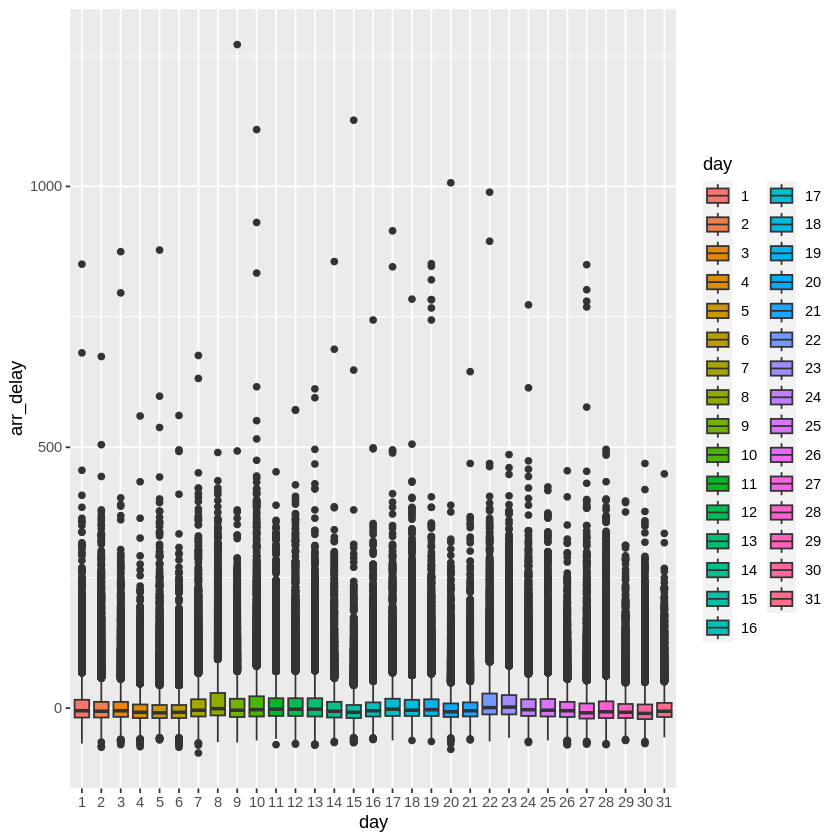

In [ ]:
flights |>
  select(month, day, arr_delay) |>
  mutate(day=as_factor(day)) |>
  group_by(month) |>
  ggplot(
    aes(x=day, y=arr_delay)
  ) +
  geom_boxplot(aes(fill=day))

4. What happens if you supply a negative n to slice_min() and friends?

In [ ]:
flights |>
  select(month, day, arr_delay) |>
  filter(arr_delay != is.na(arr_delay)) |>
  mutate(day=as_factor(day)) |>
  arrange(arr_delay) |>
  slice_min(arr_delay, n=1)

month,day,arr_delay
<int>,<fct>,<dbl>
5,7,-86


5. Explain what `count()` does in terms of the dplyr verbs you just learned. What does the `sort` argument to `count()`

In [ ]:
?count()